In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.ndimage.filters import gaussian_filter1d
import utilities as u
import preprocessing as pp
import behavior as b

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
df = pp.load_session_db()
df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
# tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging|FreqMorph_Decision|FreqMorph_Timeout'
tracks = 'TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]
df = df[(df['ImagingRegion']=="") | (df['ImagingRegion']=="CA1")]

G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222168.1\09_08_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!


In [25]:
# function for getting lick and speed data

def load_lick_mat(sess):
    VRDat= pp.behavior_dataframe(sess['data file'])
    trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
    lick_trial_mat= u.make_pos_bin_trial_matrices(VRDat['lick']._values,
                                                            VRDat['pos']._values,
                                                            VRDat['tstart']._values,
                                                            VRDat['teleport']._values,
                                                            mat_only=True,bin_size=10)
    return lick_trial_mat, trial_info


def build_matrix(mouse_list,first_sess=5):
    
    L= {}
    for m, mouse in enumerate(mouse_list):    
        print(mouse)
        df_mouse = df[df['MouseName'].str.match(mouse)]
        for i, sess_ind in enumerate(range(first_sess,df_mouse.shape[0])):
            lick_mat, trial_info = load_lick_mat(df_mouse.iloc[sess_ind])
            _mu, l = u.across_trial_avg(lick_mat,trial_info['morphs'])
            
            if i==0:
                lick_mu = lick_mat
                morph = trial_info['morphs']
            else:
                lick_mu = np.concatenate((lick_mu,lick_mat),axis=0)
                morph = np.concatenate((morph,trial_info['morphs']))
            
                
        L[mouse]={}
        L[mouse]['licks']=lick_mu
        L[mouse]['morphs']=morph
       
        
    return L

LD_rare = build_matrix(['4139265.3','4139265.4','4139265.5'])
LD_fam = build_matrix(['4222153.1','4222153.2','4222153.3','4222174.1'],first_sess=4)


4139265.3
4139265.4
4139265.5
4222153.1
4222153.2
4222153.3
4222174.1


(600, 45)
(720, 45)
(600, 45)
(281, 45)
(425, 45)
(90, 45)
(400, 45)


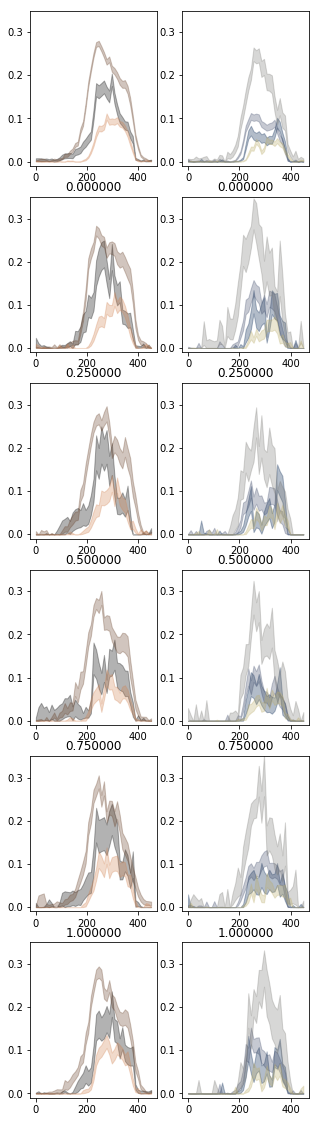

In [31]:
f,ax = plt.subplots(6,2,figsize=[5,20])
nbins = 45
cmaps = ['copper','cividis']



for i,L in enumerate([LD_rare,LD_fam]):
    nmice = len(L.keys())
    cm  = plt.cm.get_cmap(cmaps[i])
    
    for z, mouse in enumerate(L.keys()):
        licks = L[mouse]['licks']
        morphs = L[mouse]['morphs']
        print(licks.shape)
        mu = licks.mean(axis=0)
        sem = sp.stats.sem(licks,axis=0)
        
        
        ax[0,i].fill_between(np.linspace(0,450,num=nbins),mu-sem,y2=mu+sem,alpha=.3,color=cm(np.float(z/nmice)))
        ax[0,i].set_ylim([-.01,.35])
        
        #         sem/=norm
        for j, m in enumerate([0.,.25,.5,.75,1.]):
            mask = morphs==m
            mu = licks[mask,:].mean(axis=0)
            sem = sp.stats.sem(licks[mask,:],axis=0)
            
            ax[j+1,i].fill_between(np.linspace(0,450,num=nbins),mu-sem,y2=mu+sem,alpha=.3,color=cm(np.float(z/nmice)))
            ax[j+1,i].set_ylim([-.01,.35])
            ax[j+1,i].set_title("%f" % m)
            
f.savefig("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures\\python_outputs\\licking_behavior.pdf",format='pdf')

In [5]:
# function for lick accuracy (percent of licks in 50 cm preceding reward bin)

def lick_accuracy(lick_mat,edges,trial_info):
    
    

In [ ]:
# lick accuracy over imaging sessions, broken down by morph value